# WeatherPy
----

ANALYSIS 
Run Date: 8/4/20

1.The first observable trend relates to how temperatures are typically higher slighly north of the equator. I am unsure why that is but it is clear that todays random sample of data shows this to be true.

2. The second observable trend relates to how most of these randomly selected cities have wind speeds below 15 MPH. However the wind speeds really don't seem to correlate to the latitude at all.

3. The third observable trend is that most cities have humidity % greater than 40 but almost always, humidity for cities near the equator will be above 60.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# store api url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Set empty lists to hold details
city_n = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
rec = 0
sets = 1

print('Beginning Data Retrieval')
print('-----------------------------')
#loop through list of random cities
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        city_n.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])    
        humidity.append(response['main']['humidity'])  
        cloudiness.append(response['clouds']['all'])  
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])  
        date.append(response['dt'])  
        rec = rec + 1
        print(f"Processing Record {rec} of Set {sets} | {city}")
    except:
        print('City not found. Skipping...')
        pass
    if rec == 50:
        sets += 1
        rec = 0
        time.sleep(60)
#         break
        
print('-----------------------------------------')
print('Data Retrieval Complete')
print('-----------------------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | hovd
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | bambanglipuro
Processing Record 8 of Set 1 | pacific grove
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | ganzhou
Processing Record 12 of Set 1 | swan hill
Processing Record 13 of Set 1 | vaini
City not found. Skipping...
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | phatthalung
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | puerto del rosario
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | chanika
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of Set 1 | namanga
Processing Record 21 of Set 1 | ushuai

Processing Record 37 of Set 4 | tupiza
Processing Record 38 of Set 4 | bathsheba
City not found. Skipping...
Processing Record 39 of Set 4 | san isidro
Processing Record 40 of Set 4 | chenghai
Processing Record 41 of Set 4 | palora
Processing Record 42 of Set 4 | araceli
Processing Record 43 of Set 4 | lambari
Processing Record 44 of Set 4 | banjar
Processing Record 45 of Set 4 | bengkulu
Processing Record 46 of Set 4 | fairbanks
Processing Record 47 of Set 4 | sorong
Processing Record 48 of Set 4 | governador dix-sept rosado
Processing Record 49 of Set 4 | banda aceh
Processing Record 50 of Set 4 | clyde river
Processing Record 1 of Set 5 | bonavista
Processing Record 2 of Set 5 | sobolevo
Processing Record 3 of Set 5 | les escoumins
Processing Record 4 of Set 5 | vilhena
City not found. Skipping...
City not found. Skipping...
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | kabardinka
City not found. Skipping...
Processing Record 7 of Set 5 | carnarvon
Processing

Processing Record 20 of Set 8 | palana
Processing Record 21 of Set 8 | roma
Processing Record 22 of Set 8 | tabas
Processing Record 23 of Set 8 | iisalmi
Processing Record 24 of Set 8 | awbari
Processing Record 25 of Set 8 | starodubskoye
Processing Record 26 of Set 8 | laurel
Processing Record 27 of Set 8 | moussoro
Processing Record 28 of Set 8 | arman
Processing Record 29 of Set 8 | maralal
Processing Record 30 of Set 8 | muli
Processing Record 31 of Set 8 | saint-louis
Processing Record 32 of Set 8 | dickinson
Processing Record 33 of Set 8 | wawa
Processing Record 34 of Set 8 | gigmoto
Processing Record 35 of Set 8 | boyolangu
Processing Record 36 of Set 8 | port macquarie
Processing Record 37 of Set 8 | khandyga
Processing Record 38 of Set 8 | broome
Processing Record 39 of Set 8 | thunder bay
Processing Record 40 of Set 8 | sault sainte marie
Processing Record 41 of Set 8 | mashhad
Processing Record 42 of Set 8 | sol-iletsk
Processing Record 43 of Set 8 | zilair
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_weather_df = pd.DataFrame({'City': city_n, 'Lat': lat, 'Lng': lng, 'Max Temp': max_temp,'Humidity': humidity,'Cloudiness': cloudiness,'Wind Speed':wind_speed,'Country':country,'Date':date})
cities_weather_df.count()

City          538
Lat           538
Lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64

In [6]:
cities_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,44.60,70,75,17.22,AU,1596611250
1,Rikitea,-23.12,-134.97,72.90,90,96,12.01,PF,1596611252
2,Ilulissat,69.22,-51.10,42.80,87,98,8.05,GL,1596611253
3,Khovd,48.01,91.64,71.13,43,61,7.70,MN,1596611066
4,Hilo,19.73,-155.09,75.20,73,90,5.82,US,1596611256


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cities_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02
mean,19.184888,19.682193,69.821022,68.962825,49.535316,7.765743,1.596612e+09
std,33.269606,90.990490,14.363385,21.816368,40.306318,5.027761,2.840012e+02
min,-54.800000,-179.170000,28.400000,3.000000,0.000000,0.070000,1.596611e+09
25%,-8.135000,-57.567500,59.000000,56.000000,1.000000,3.855000,1.596612e+09
50%,22.680000,23.325000,71.130000,74.000000,42.000000,6.790000,1.596612e+09
75%,46.665000,103.192500,80.797500,87.000000,90.000000,10.887500,1.596612e+09
max,78.220000,178.420000,109.650000,100.000000,100.000000,31.680000,1.596612e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = cities_weather_df.loc[cities_weather_df['Humidity']>100]
high_humidity.index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_weather_df.drop(high_humidity.index)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,44.60,70,75,17.22,AU,1596611250
1,Rikitea,-23.12,-134.97,72.90,90,96,12.01,PF,1596611252
2,Ilulissat,69.22,-51.10,42.80,87,98,8.05,GL,1596611253
3,Khovd,48.01,91.64,71.13,43,61,7.70,MN,1596611066
4,Hilo,19.73,-155.09,75.20,73,90,5.82,US,1596611256


In [10]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_data.to_csv('city_data.csv', index=True, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

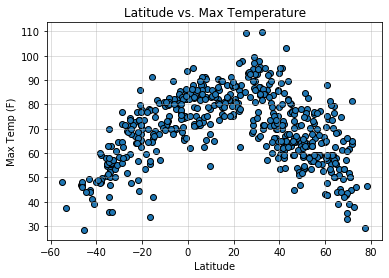

In [11]:
plt.scatter(x=clean_city_data['Lat'],y=clean_city_data['Max Temp'],edgecolor='black')
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(linestyle='-',alpha=.5)
plt.savefig('../Images/Latitude vs Temp.png')

Each plot point represents a city's latitud on the x-axis, with it's corresponding maximum temperature on the y-axis. In this data set, it appears that the highest temeperatures are recorded between 20-40 degrees north of the equator.

## Latitude vs. Humidity Plot

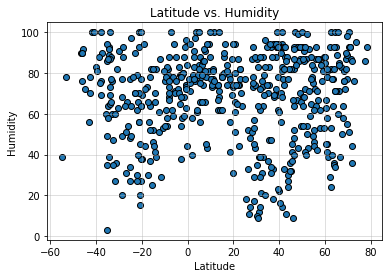

In [12]:
plt.scatter(x=clean_city_data['Lat'],y=clean_city_data['Humidity'],edgecolor='black')
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(linestyle='-',alpha=.5)
plt.savefig('../Images/Latitude vs Humidity.png')

There is higher humidity in the northern hemisphere. 

## Latitude vs. Cloudiness Plot

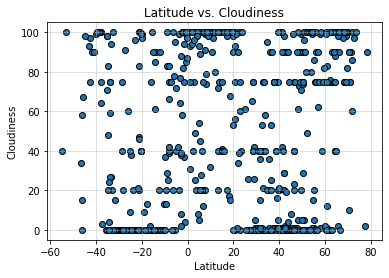

In [13]:
plt.scatter(x=clean_city_data['Lat'],y=clean_city_data['Cloudiness'],edgecolor='black')
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(linestyle='-',alpha=.5)
plt.savefig('../Images/Latitude vs Cloudiness.png')

This doesn't seem to provide any useful information to analyze.

## Latitude vs. Wind Speed Plot

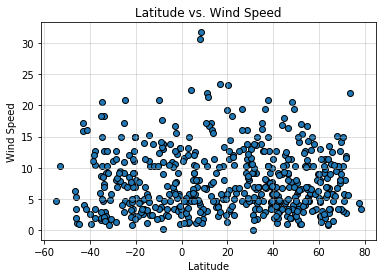

In [14]:
plt.scatter(x=clean_city_data['Lat'],y=clean_city_data['Wind Speed'],edgecolor='black')
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(linestyle='-',alpha=.5)
plt.savefig('../Images/Latitude vs Wind Speed.png')

There isn't any specific observable trend between the latitude and wind speed.  The plots seem to spread for all cities.

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

In [16]:
# Create Northern and Southern Hemisphere DataFrames
southern_hem_df = clean_city_data.loc[clean_city_data['Lat']<0.0]
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,44.60,70,75,17.22,AU,1596611250
1,Rikitea,-23.12,-134.97,72.90,90,96,12.01,PF,1596611252
6,Bambanglipuro,-7.95,110.28,80.60,68,39,13.00,ID,1596611258
9,Bredasdorp,-34.53,20.04,35.60,93,4,4.70,ZA,1596611261
11,Swan Hill,-35.34,143.55,50.61,49,0,8.66,AU,1596611263


In [17]:
northern_hem_df = clean_city_data.loc[clean_city_data['Lat']>=0.0]
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Ilulissat,69.22,-51.10,42.80,87,98,8.05,GL,1596611253
3,Khovd,48.01,91.64,71.13,43,61,7.70,MN,1596611066
4,Hilo,19.73,-155.09,75.20,73,90,5.82,US,1596611256
5,Butaritari,3.07,172.79,83.80,76,49,14.94,KI,1596611256
7,Pacific Grove,36.62,-121.92,60.01,93,25,3.00,US,1596610975


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared is: 0.404144
y =-0.45x + 89.23


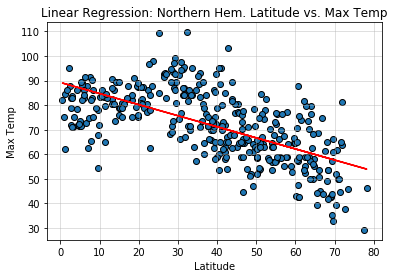

In [18]:
x=northern_hem_df['Lat']
y=northern_hem_df['Max Temp']
slope, intercept, r_value, p_value, std_err = linregress(x,y)
# print("The slope is: %f    The intercept is: %f" % (slope, intercept))
print("The R-squared is: %f" % r_value**2)
equation = 'y ='+ str(round(slope,2))+'x + '+ str(round(intercept,2))
print(equation)
plt.scatter(x,y,edgecolor='black')
plt.title('Linear Regression: Northern Hem. Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid(linestyle='-',alpha=.5)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.savefig('../Images/Linear Regression-Northern Hem. Latitude vs. Max Temp.png')

This shows a strong negative correlation between latitude and maximum temperature in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared is: 0.596177
y =0.77x + 81.56


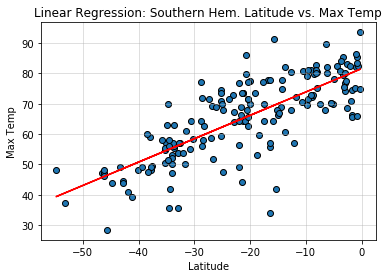

In [19]:
x=southern_hem_df['Lat']
y=southern_hem_df['Max Temp']
slope, intercept, r_value, p_value, std_err = linregress(x,y)
# print("The slope is: %f    The intercept is: %f" % (slope, intercept))
print("The R-squared is: %f" % r_value**2)
equation = 'y ='+ str(round(slope,2))+'x + '+ str(round(intercept,2))
print(equation)
plt.scatter(x,y,edgecolor='black')
plt.title('Linear Regression: Southern Hem. Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid(linestyle='-',alpha=.5)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.savefig('../Images/Linear Regression-Southern Hem. Latitude vs. Max Temp.png')

This shows a strong positive correlation between latitude and maximum temperature in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The slope is: -0.036614    The intercept is: 71.358309
The R-squared is: 0.001099
y =-0.04x + 71.36


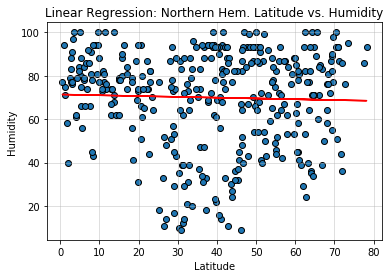

In [26]:
x=northern_hem_df['Lat']
y=northern_hem_df['Humidity']
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("The slope is: %f    The intercept is: %f" % (slope, intercept))
print("The R-squared is: %f" % r_value**2)
equation = 'y ='+ str(round(slope,2))+'x + '+ str(round(intercept,2))
print(equation)
plt.scatter(x,y,edgecolor='black')
plt.title('Linear Regression: Northern Hem. Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(linestyle='-',alpha=.5)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.savefig('../Images/Linear Regression-Northern Hem. Latitude vs. Humidity.png')

There is an slight negative correlation between latitude and humidity in the northern hemisphere for this data set. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared is: 0.000812
y =-0.04x + 65.98


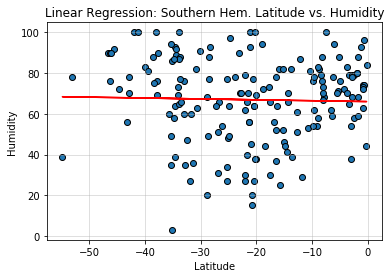

In [21]:
x=southern_hem_df['Lat']
y=southern_hem_df['Humidity']
slope, intercept, r_value, p_value, std_err = linregress(x,y)
# print("The slope is: %f    The intercept is: %f" % (slope, intercept))
print("The R-squared is: %f" % r_value**2)
equation = 'y ='+ str(round(slope,2))+'x + '+ str(round(intercept,2))
print(equation)
plt.scatter(x,y,edgecolor='black')
plt.title('Linear Regression: Southern Hem. Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(linestyle='-',alpha=.5)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.savefig('../Images/Linear Regression-Southern Hem. Latitude vs. Humidity.png')

There is an slight negative correlation between latitude and humidity in the southern hemisphere for this data set. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared is: 0.000078
y =0.02x + 52.06


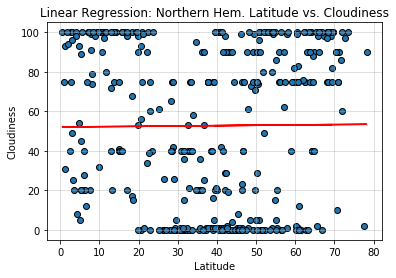

In [22]:
x=northern_hem_df['Lat']
y=northern_hem_df['Cloudiness']
slope, intercept, r_value, p_value, std_err = linregress(x,y)
# print("The slope is: %f    The intercept is: %f" % (slope, intercept))
print("The R-squared is: %f" % r_value**2)
equation = 'y ='+ str(round(slope,2))+'x + '+ str(round(intercept,2))
print(equation)
plt.scatter(x,y,edgecolor='black')
plt.title('Linear Regression: Northern Hem. Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(linestyle='-',alpha=.5)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.savefig('../Images/Linear Regression-Northern Hem. Latitude vs. Cloudiness.png')

There is a slight positve correlation between latitude and cloudiness in the northern hemisphere for this data set. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared is: 0.007485
y =0.26x + 48.2


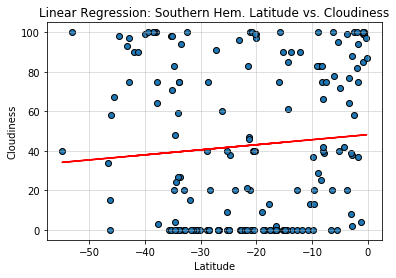

In [23]:
x=southern_hem_df['Lat']
y=southern_hem_df['Cloudiness']
slope, intercept, r_value, p_value, std_err = linregress(x,y)
# print("The slope is: %f    The intercept is: %f" % (slope, intercept))
print("The R-squared is: %f" % r_value**2)
equation = 'y ='+ str(round(slope,2))+'x + '+ str(round(intercept,2))
print(equation)
plt.scatter(x,y,edgecolor='black')
plt.title('Linear Regression: Southern Hem. Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(linestyle='-',alpha=.5)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.savefig('../Images/Linear Regression-Southern Hem. Latitude vs. Cloudiness.png')

There is a slight positve correlation between latitude and cloudiness in the southern hemisphere for this data set.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared is: 0.006039
y =-0.02x + 8.61


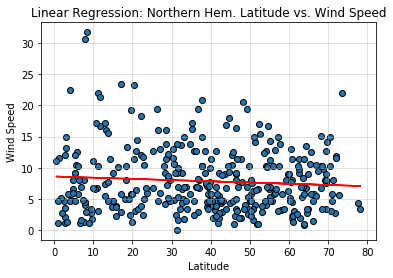

In [24]:
x=northern_hem_df['Lat']
y=northern_hem_df['Wind Speed']
slope, intercept, r_value, p_value, std_err = linregress(x,y)
# print("The slope is: %f    The intercept is: %f" % (slope, intercept))
print("The R-squared is: %f" % r_value**2)
equation = 'y ='+ str(round(slope,2))+'x + '+ str(round(intercept,2))
print(equation)
plt.scatter(x,y,edgecolor='black')
plt.title('Linear Regression: Northern Hem. Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(linestyle='-',alpha=.5)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.savefig('../Images/Linear Regression-Northern Hem. Latitude vs. Wind Speed.png')

There is a slight negative correlation between latitude and wind speed in the northern hemisphere for this data set.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared is: 0.001480
y =0.01x + 7.85


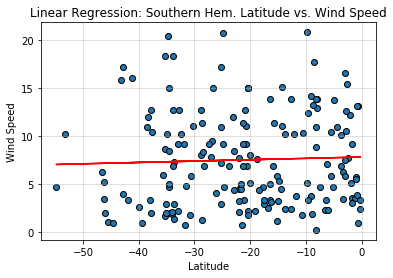

In [25]:
x=southern_hem_df['Lat']
y=southern_hem_df['Wind Speed']
slope, intercept, r_value, p_value, std_err = linregress(x,y)
# print("The slope is: %f    The intercept is: %f" % (slope, intercept))
print("The R-squared is: %f" % r_value**2)
equation = 'y ='+ str(round(slope,2))+'x + '+ str(round(intercept,2))
print(equation)
plt.scatter(x,y,edgecolor='black')
plt.title('Linear Regression: Southern Hem. Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(linestyle='-',alpha=.5)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.savefig('../Images/Linear Regression-Southern Hem. Latitude vs. Wind Speed.png')

There is a slight positve correlation between latitude and wind speed in the southern hemisphere for this data set.